# Projeto de Regressão Linear

Siga as etapas para analisar os dados do cliente.

## Imports
** Importe pandas, numpy, matplotlib e seaborn. **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)


Pandas: 2.2.3
NumPy: 2.2.4
Matplotlib: 3.10.1
Seaborn: 0.13.2


## Obter dados

In [2]:
# dados
data = pd.DataFrame({
    'House': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'SquareFootage': [1000, 1200, 1500, 1800, 2200, 1350, 2000, 1750, 1650, 1900, 1300, 2500, 1400, 2050, 2250, 1600, 1950, 2200, 1800, 1250],
    'Price': [100000, 150000, 200000, 250000, 300000, 175000, 225000, 210000, 195000, 240000, 160000, 325000, 170000, 235000, 275000, 190000, 230000, 300000, 250000, 145000]
})

** Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe(). **

In [3]:
print("\nCabeçalho dos dados:")
print(data.head())

print("\nInformações sobre o DataFrame:")
data.info()

print("\nEstatísticas descritivas:")
print(data.describe())


Cabeçalho dos dados:
   House  SquareFootage   Price
0      1           1000  100000
1      2           1200  150000
2      3           1500  200000
3      4           1800  250000
4      5           2200  300000

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   House          20 non-null     int64
 1   SquareFootage  20 non-null     int64
 2   Price          20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes

Estatísticas descritivas:
          House  SquareFootage         Price
count  20.00000      20.000000      20.00000
mean   10.50000    1732.500000  216250.00000
std     5.91608     405.642765   58125.88426
min     1.00000    1000.000000  100000.00000
25%     5.75000    1387.500000  173750.00000
50%    10.50000    1775.000000  217500.00000
75%    15.25000    2012.500000  250000.00000
max    20.00

In [4]:
data.describe()

,House,SquareFootage,Price
count,20.00000,20.000000,20.00000
mean,10.50000,1732.500000,216250.00000
std,5.91608,405.642765,58125.88426
min,1.00000,1000.000000,100000.00000
25%,5.75000,1387.500000,173750.00000
50%,10.50000,1775.000000,217500.00000
75%,15.25000,2012.500000,250000.00000
max,20.00000,2500.000000,325000.00000


In [5]:
print("\nNome das colunas:")
print(data.columns)


Nome das colunas:
Index(['House', 'SquareFootage', 'Price'], dtype='object')


## Análise de dados exploratória

** Use seaborn para criar um pairplot e comparar as relações no conjunto de dados **

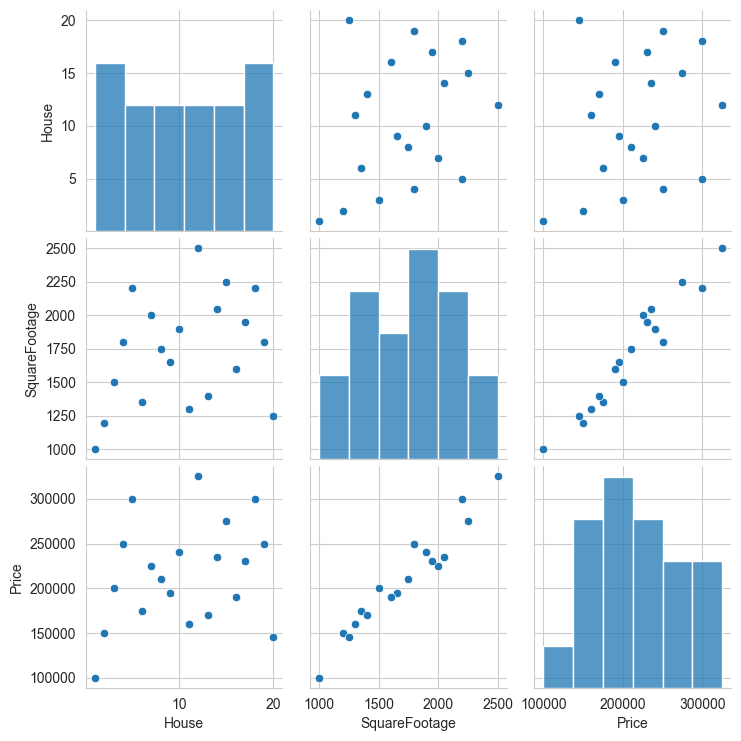

In [6]:
sns.pairplot(data)
plt.show()

## Treinar e testar os dados

Agora que explorámos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treino e teste.
** Defina uma variável X igual a todas as caraterísticas numéricas dos clientes e uma variável Y igual à coluna Valor Anual Gasto (Yearly Amount Spent). **

In [7]:
from sklearn.model_selection import train_test_split

X = data[['SquareFootage']]
Y = data['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("\nTamanho dos conjuntos de treino e teste:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("Y_train:", Y_train.shape, "Y_test:", Y_test.shape)


Tamanho dos conjuntos de treino e teste:
X_train: (14, 1) X_test: (6, 1)
Y_train: (14,) Y_test: (6,)


In [8]:
# Split the data into training and testing sets
X = data['SquareFootage'].values.reshape(-1, 1)  

# Independent variable
y = data['Price'].values  # Dependent variable

** Use train_test_split da sklearn para dividir os dados em conjuntos de treino e teste. Defina test_size = 0.2 e random_state = 42 **

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinar o modelo

** Importe LinearRegression do sklearn.linear_model **

In [10]:

from sklearn.linear_model import LinearRegression

** Crie uma instância de um modelo LinearRegression () chamado model. **

In [11]:
model = LinearRegression()

** Treine model nos dados de treino. **

In [12]:
model.fit(X_train, Y_train)

LinearRegression()

**Faça um Print dos coeficientes do modelo**

In [13]:
print("Coeficiente angular (slope):", model.coef_[0])
print("Coeficiente linear (intercept):", model.intercept_)

Coeficiente angular (slope): 129.38851429900024
Coeficiente linear (intercept): -7623.808416647284


In [15]:
# Calculate R-squared on the testing set
# An R-squared value of 0.95 is considered very good in the context of simple linear regression. 
# The value is between 0 and 1, and the 0.95 value in our case indicates that 95% of the variation 
# in the price, can be explained by the independent variable (square footage), which indicates a 
# strong correlation
r_squared = model.score(X_test, Y_test)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.95


## Previsão de dados de teste
Agora que nos ajustámos ao modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

** Use model.predict() para prever o conjunto X_test dos dados. **

In [16]:
new_sqft = [[1100], [1700], [2000]]
predictions = model.predict(new_sqft)

print("Previsões para novos valores de Square Footage:", new_sqft)
print("Previsões de preços:", predictions)

Previsões para novos valores de Square Footage: [[1100], [1700], [2000]]
Previsões de preços: [134703.55731225 212336.66589165 251153.22018135]


## Conclusão

In [ ]:
# O modelo de regressão linear 
# ajustada demonstra que o tamanho da casa 
# explica cerca de 95% da variação dos preços, 
# evidenciando uma forte relação entre ambas as variáveis. 
# As previsões para novos valores de square footage 
# foram consistentes com os dados, confirmando a eficácia do modelo.